In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# Import Data

In [2]:
pdd=pd.read_csv('pinduoduo.csv')
pdd.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


# EDA

In [3]:
pdd.info()
#无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
ID                            25317 non-null int64
age                           25317 non-null int64
job                           25317 non-null object
marital                       25317 non-null object
default                       25317 non-null object
returned                      25317 non-null object
loan                          25317 non-null object
coupon_used_in_last6_month    25317 non-null int64
coupon_used_in_last_month     25317 non-null int64
coupon_ind                    25317 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [4]:
pdd.describe(include='all')

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317,25317,25317,25317,25317,25317.000000,25317.000000,25317.000000
unique,NaN,NaN,12,3,2,2,2,NaN,NaN,NaN
top,NaN,NaN,blue-collar,married,no,yes,no,NaN,NaN,NaN
freq,NaN,NaN,5456,15245,24869,14020,21258,NaN,NaN,NaN
mean,12659.000000,40.935379,NaN,NaN,NaN,NaN,NaN,2.772050,0.292847,0.116957
std,7308.532719,10.634289,NaN,NaN,NaN,NaN,NaN,3.136097,0.765498,0.321375
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000


In [5]:
# age可能存在异常值 95
# coupon_used_in_last6_month分布较为离散，可以尝试分箱操作

In [6]:
#数据中无重复值
sum(pdd.duplicated())

0

关键列

In [7]:
pdd=pdd.rename(columns={'coupon_ind':'flag'})

In [8]:
pdd.flag.value_counts(1)

0    0.883043
1    0.116957
Name: flag, dtype: float64

In [9]:
#使用优惠券的人占11.6%，可以接受

数值型变量

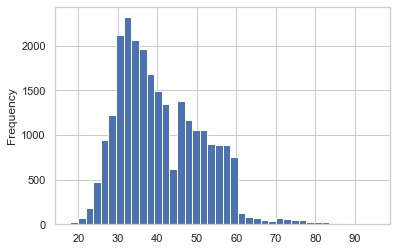

In [10]:
pdd['age'].plot(kind='hist', bins=40)

In [11]:
#年龄集中在25-60，可以分箱

In [12]:
#找出离群值
diff=pdd['age'].describe()['75%']-pdd['age'].describe()['25%']
max=pdd['age'].describe()['75%']+1.5*diff
max

70.5

In [13]:
#若取age<=70,会失去1.12%的数据，可接受
(pdd.shape[0]-pdd[pdd['age']<=70].shape[0])/pdd.shape[0]

0.01121775881818541

In [14]:
#删除年龄离群值
pdd=pdd[pdd['age']<=70]

In [15]:
pdd['coupon_used_in_last6_month'].describe()

count    25033.000000
mean         2.779171
std          3.146620
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
Name: coupon_used_in_last6_month, dtype: float64

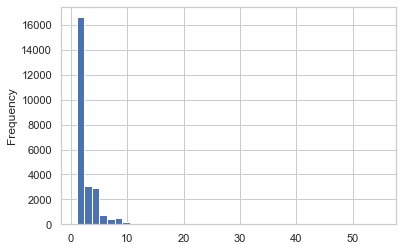

In [16]:
pdd['coupon_used_in_last6_month'].plot(kind='hist', bins=40);

In [17]:
#长尾，找出离群值
diff=pdd['coupon_used_in_last6_month'].describe()['75%']-pdd['coupon_used_in_last6_month'].describe()['25%']
max=pdd['coupon_used_in_last6_month'].describe()['75%']+1.5*diff
max

6.0

In [18]:
#若取coupon_used_in_last6_month<=6,会失去6.78%的数据，在可接受范围内
(pdd.shape[0]-pdd[pdd['coupon_used_in_last6_month']<=6].shape[0])/pdd.shape[0]

0.06822993648384133

In [19]:
#删除离群值
pdd=pdd[pdd['coupon_used_in_last6_month']<=6]

In [20]:
pdd['coupon_used_in_last_month'].describe()

count    23325.000000
mean         0.292819
std          0.724952
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: coupon_used_in_last_month, dtype: float64

In [21]:
pdd[pdd['coupon_used_in_last_month']==0].shape[0]/pdd.shape[0]
#8成用户上个月都没有用优惠券

0.8104180064308681

类别型变量

In [22]:
pdd.job.value_counts()

blue-collar      5082
management       4885
technician       3914
admin.           2726
services         2183
retired           990
self-employed     823
entrepreneur      787
unemployed        676
housemaid         606
student           512
unknown           141
Name: job, dtype: int64

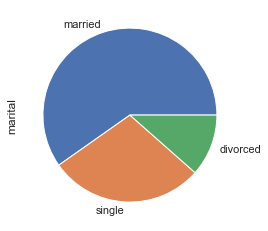

In [23]:
pdd.marital.value_counts().plot(kind='pie')

In [24]:
pdd.default.value_counts()

no     22922
yes      403
Name: default, dtype: int64

In [25]:
pdd.returned.value_counts()

yes    13141
no     10184
Name: returned, dtype: int64

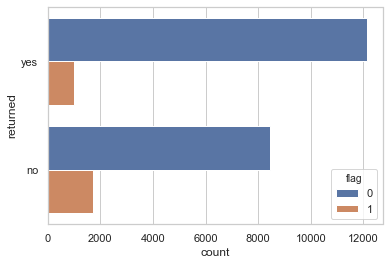

In [26]:
sns.countplot(y='returned',hue='flag',data=pdd)

In [27]:
pdd.loan.value_counts()

no     19576
yes     3749
Name: loan, dtype: int64

In [28]:
pdd=pd.get_dummies(pdd)
pdd.head()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,returned_no,returned_yes,loan_no,loan_yes
0,1,43,2,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
1,2,42,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,3,47,2,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,4,28,2,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
4,5,42,5,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [29]:
pdd.drop(['ID','default_no','returned_no','loan_no'],axis=1,inplace=True)

In [30]:
pdd.head()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_yes,returned_yes,loan_yes
0,43,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,42,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,47,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,28,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
4,42,5,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [31]:
pdd.groupby(['flag']).mean()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_yes,returned_yes,loan_yes
flag,,,,,,,,,,,,,,,,,,,,,
0,40.524198,2.164091,0.259767,0.116618,0.228669,0.035131,0.027017,0.203110,0.039213,0.035180,...,0.017979,0.167687,0.027308,0.005977,0.115500,0.608358,0.276142,0.018416,0.589067,0.169096
1,40.301275,1.888525,0.540619,0.118761,0.136976,0.023315,0.018215,0.256831,0.066667,0.036066,...,0.051730,0.168670,0.041530,0.006557,0.112568,0.517304,0.370128,0.008743,0.370856,0.097996


In [32]:
#符合以下情况的用户更可能使用优惠券：
#上个月用的优惠券数量越多
#过去六个月没有使用太多优惠券（过去六个月用的多说明购物多，这次继续购物的可能性就减少，使用优惠券的概率也相对小）
#没有退货行为
#退休人士/学生/失业人群
#单身人群
#非信用卡的用户

# 相关性分析

In [33]:
pdd.corr()['flag'].sort_values(ascending=False)

flag                          1.000000
coupon_used_in_last_month     0.124839
job_student                   0.074227
marital_single                0.066935
job_retired                   0.043882
job_management                0.042543
job_unemployed                0.027318
job_unknown                   0.002414
job_admin.                    0.002150
job_self-employed             0.001547
job_technician                0.000848
marital_divorced             -0.002960
age                          -0.007172
job_housemaid                -0.017829
job_entrepreneur             -0.021087
job_services                 -0.023711
default_yes                  -0.023920
marital_married              -0.059833
loan_yes                     -0.062380
coupon_used_in_last6_month   -0.067464
job_blue-collar              -0.071575
returned_yes                 -0.141774
Name: flag, dtype: float64

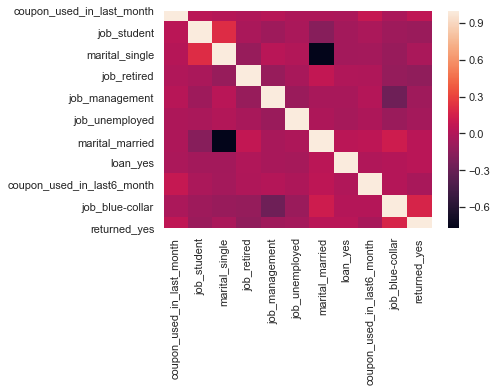

In [34]:
q1=['coupon_used_in_last_month', 'job_student', 'marital_single','job_retired','job_management','job_unemployed',
    'marital_married','loan_yes','coupon_used_in_last6_month','job_blue-collar','returned_yes']
sns.heatmap(pdd[q1].corr())

# 模型建立 

In [35]:
y=pdd['flag']
x=pdd[['coupon_used_in_last_month', 'job_student', 'marital_single','job_retired','job_management','job_unemployed',
    'marital_married','loan_yes','coupon_used_in_last6_month','job_blue-collar','returned_yes']]

In [36]:
#调用sklearn模块，随机抽取训练集与测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [37]:
#调用sklearn中逻辑回归模块
from sklearn import linear_model
lr=linear_model.LogisticRegression()

In [38]:
#模型拟合
lr.fit(x_train,y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#模型的截距与系数
lr.intercept_

array([-1.29772036])

In [40]:
lr.coef_

array([[ 0.50429086,  0.59938599,  0.2592328 ,  0.41205734,  0.21818936,
         0.33533269, -0.0722816 , -0.49721391, -0.26037011, -0.25374964,
        -0.85610703]])

In [41]:
#模型的评估
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [42]:
#搭建混淆矩阵
import sklearn.metrics as metrics

In [43]:
#训练集混淆矩阵
metrics.confusion_matrix(y_train,y_pred_train)

array([[14372,    19],
       [ 1928,     8]], dtype=int64)

In [44]:
#训练集预测准确率
metrics.accuracy_score(y_train,y_pred_train)

0.8807496784467447

In [45]:
#测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[6176,   13],
       [ 804,    5]], dtype=int64)

In [46]:
#测试集预测准确率
metrics.accuracy_score(y_test,y_pred_test)

0.883252357816519

模型预测准确率达到88%，较高
    
    同时可以发现：
    以下用户特征会提高优惠券使用率：
    上月使用过一定量的优惠券，学生身份，退休/失业人群，单身，从事管理工作
    以下用户特征会降低优惠券使用率：
    已婚，使用信用卡支付，过去六个月使用较多优惠券，蓝领，有过退货行为


# 模型优化
1. 删除离群值(已完成)
2. train_test_split:50%/50%
3. 年龄分箱

# 优化一：train_test_split:50%/50%

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [48]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()

In [49]:
lr.fit(x_train,y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lr.intercept_

array([-1.28398496])

In [51]:
lr.coef_

array([[ 0.51315232,  0.5743577 ,  0.27749254,  0.51021663,  0.23471812,
         0.33391312, -0.11030196, -0.57519875, -0.2632076 , -0.2990363 ,
        -0.82988961]])

In [52]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [53]:
metrics.accuracy_score(y_train,y_pred_train)

0.8800377293774653

In [54]:
metrics.accuracy_score(y_test,y_pred_test)

0.8829632170110606

测试集准确率下降，未能优化模型，依旧采用7/3分

# 优化二：年龄分箱

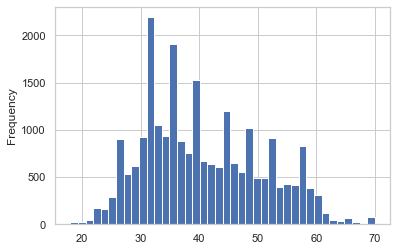

In [55]:
pdd['age'].plot(kind='hist', bins=40)

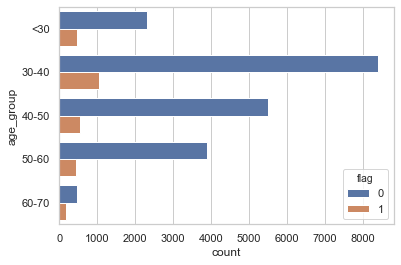

In [56]:
bins=[0,30,40,50,60,70]
labels=['<30','30-40','40-50','50-60','60-70']#为组创建标签名称
pdd['age_group']=pd.cut(pdd.age, bins, right=False, labels=labels)
sns.countplot(y='age_group', hue='flag',data=pdd)

In [57]:
pdd=pd.get_dummies(pdd)
pdd.head()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,default_yes,returned_yes,loan_yes,age_group_<30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70
0,43,2,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,42,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,47,2,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
3,28,2,0,0,0,0,0,0,1,0,...,0,1,0,1,1,1,0,0,0,0
4,42,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [58]:
pdd.groupby(['flag']).mean()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_married,marital_single,default_yes,returned_yes,loan_yes,age_group_<30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70
flag,,,,,,,,,,,,,,,,,,,,,
0,40.524198,2.164091,0.259767,0.116618,0.228669,0.035131,0.027017,0.203110,0.039213,0.035180,...,0.608358,0.276142,0.018416,0.589067,0.169096,0.112293,0.407629,0.266861,0.189553,0.022352
1,40.301275,1.888525,0.540619,0.118761,0.136976,0.023315,0.018215,0.256831,0.066667,0.036066,...,0.517304,0.370128,0.008743,0.370856,0.097996,0.172678,0.386157,0.204736,0.160656,0.071038


可以发现年龄<30，以及年龄在60-70之间的用户更有可能使用优惠券

In [59]:
pdd.corr()['flag'].sort_values(ascending=False)

flag                          1.000000
coupon_used_in_last_month     0.124839
age_group_60-70               0.094963
job_student                   0.074227
marital_single                0.066935
age_group_<30                 0.060007
job_retired                   0.043882
job_management                0.042543
job_unemployed                0.027318
job_unknown                   0.002414
job_admin.                    0.002150
job_self-employed             0.001547
job_technician                0.000848
marital_divorced             -0.002960
age                          -0.007172
age_group_30-40              -0.014094
job_housemaid                -0.017829
job_entrepreneur             -0.021087
job_services                 -0.023711
default_yes                  -0.023920
age_group_50-60              -0.023923
age_group_40-50              -0.045665
marital_married              -0.059833
loan_yes                     -0.062380
coupon_used_in_last6_month   -0.067464
job_blue-collar          

In [78]:
y=pdd['flag']
x=pdd[['age_group_60-70','age_group_<30','coupon_used_in_last_month', 'job_student', 'marital_single','job_retired','job_management','job_unemployed',
    'marital_married','loan_yes','coupon_used_in_last6_month','job_blue-collar','returned_yes']]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [80]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()

In [81]:
lr.fit(x_train,y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
lr.intercept_

array([-1.34783744])

In [83]:
lr.coef_

array([[ 0.80846882,  0.37240438,  0.49857055,  0.43086552,  0.17523734,
         0.11907566,  0.22938886,  0.34366833, -0.09548084, -0.48547316,
        -0.25256081, -0.25434269, -0.8369466 ]])

In [84]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [85]:
metrics.accuracy_score(y_train,y_pred_train)

0.8808721749249709

In [86]:
metrics.accuracy_score(y_test,y_pred_test)

0.883252357816519

年龄分箱后训练集准确率略有提升，测试集准确率几乎不变，有待用更多的数据做测试，但可以说模型有所优化

# 模型解读 

In [122]:
#优化后模型系数为：
var=['age_group_60-70','age_group_<30','coupon_used_in_last_month', 'job_student', 'marital_single','job_retired',
     'job_management','job_unemployed','marital_married','loan_yes','coupon_used_in_last6_month','job_blue-collar',
     'returned_yes']
coef=[ 0.80846882,  0.37240438,  0.49857055,  0.43086552,  0.17523734,0.11907566,  0.22938886,  0.34366833, -0.09548084,
      -0.48547316,-0.25256081, -0.25434269, -0.8369466 ]

In [123]:
import math
dic={}
for i in range(len(var)):
    dic[var[i]]=math.exp(coef[i])
dic

{'age_group_60-70': 2.244468668704838,
 'age_group_<30': 1.4512197068801853,
 'coupon_used_in_last_month': 1.646366189715999,
 'job_student': 1.5385886266451423,
 'marital_single': 1.1915289805436773,
 'job_retired': 1.126455142660368,
 'job_management': 1.2578310641101165,
 'job_unemployed': 1.4101108664684063,
 'marital_married': 0.9089357766963161,
 'loan_yes': 0.6154059423890581,
 'coupon_used_in_last6_month': 0.7768089736493327,
 'job_blue-collar': 0.7754260257648707,
 'returned_yes': 0.433030722864083}

In [129]:
print('在其他条件不变的情况下，60-70岁的人使用优惠券每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['age_group_60-70']-1)*100))
print('在其他条件不变的情况下，小于30岁的人使用优惠券每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['age_group_<30']-1)*100))
print('在其他条件不变的情况下，上个月使用优惠券数量每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['coupon_used_in_last_month']-1)*100))
print('在其他条件不变的情况下，学生用户使用优惠券数量每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['job_student']-1)*100))
print('在其他条件不变的情况下，单身用户使用优惠券数量每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['marital_single']-1)*100))
print('在其他条件不变的情况下，退休用户使用优惠券数量每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['job_retired']-1)*100))
print('在其他条件不变的情况下，从事管理工作的用户使用优惠券数量每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['job_management']-1)*100))
print('在其他条件不变的情况下，失业用户使用优惠券数量每增加1，客户使用优惠券的几率提高{:.2f}%.'.format((dic['job_unemployed']-1)*100))
print('在其他条件不变的情况下，已婚用户使用优惠券数量每增加1，客户使用优惠券的几率降低{:.2f}%.'.format((dic['marital_married']-1)*-100))
print('在其他条件不变的情况下，信用卡用户使用优惠券数量每增加1，客户使用优惠券的几率降低{:.2f}%.'.format((dic['loan_yes']-1)*-100))
print('在其他条件不变的情况下，过去六个月使用优惠券数量每增加1，客户使用优惠券的几率降低{:.2f}%.'.format((dic['coupon_used_in_last6_month']-1)*-100))
print('在其他条件不变的情况下，蓝领用户使用优惠券数量每增加1，客户使用优惠券的几率降低{:.2f}%.'.format((dic['job_blue-collar']-1)*-100))
print('在其他条件不变的情况下，退过货的用户使用优惠券数量每增加1，客户使用优惠券的几率降低{:.2f}%.'.format((dic['returned_yes']-1)*-100))


在其他条件不变的情况下，60-70岁的人使用优惠券每增加1，客户使用优惠券的几率提高124.45%.
在其他条件不变的情况下，小于30岁的人使用优惠券每增加1，客户使用优惠券的几率提高45.12%.
在其他条件不变的情况下，上个月使用优惠券数量每增加1，客户使用优惠券的几率提高64.64%.
在其他条件不变的情况下，学生用户使用优惠券数量每增加1，客户使用优惠券的几率提高53.86%.
在其他条件不变的情况下，单身用户使用优惠券数量每增加1，客户使用优惠券的几率提高19.15%.
在其他条件不变的情况下，退休用户使用优惠券数量每增加1，客户使用优惠券的几率提高12.65%.
在其他条件不变的情况下，从事管理工作的用户使用优惠券数量每增加1，客户使用优惠券的几率提高25.78%.
在其他条件不变的情况下，失业用户使用优惠券数量每增加1，客户使用优惠券的几率提高41.01%.
在其他条件不变的情况下，已婚用户使用优惠券数量每增加1，客户使用优惠券的几率降低9.11%.
在其他条件不变的情况下，信用卡用户使用优惠券数量每增加1，客户使用优惠券的几率降低38.46%.
在其他条件不变的情况下，过去六个月使用优惠券数量每增加1，客户使用优惠券的几率降低22.32%.
在其他条件不变的情况下，蓝领用户使用优惠券数量每增加1，客户使用优惠券的几率降低22.46%.
在其他条件不变的情况下，退过货的用户使用优惠券数量每增加1，客户使用优惠券的几率降低56.70%.


# 业务建议 

可以向以下人群发放优惠券，以增加sales：
1. 学生
2. 小于30岁的单身人群
3. 60-70岁的退休人群
4. 失业人群
5. 上个月使用过优惠券的人

可以避免向以下人群发放优惠券，以减少cost:
1. 已婚蓝领
2. 有过较多退货记录的用户
3. 过去六个月大量使用优惠券的用户
4. 喜欢用信用卡支付的用户